# **Lab 3: Direct Sequence Spread Spectrum (DSSS)**  Check Q4
### Members: Namruth and Aisha

Text(0, 0.5, 'Amplitude')

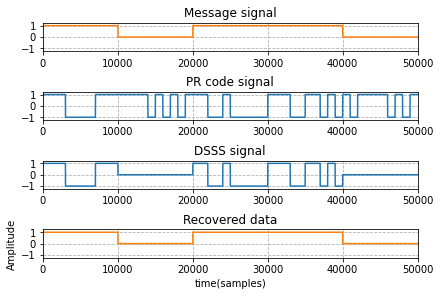

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

Fs = 1000    #Sampling frequency
length_prn = 50 
t = np.arange(0,length_prn,1/Fs)


# Generate a psudo-random code  
PNcode = np.random.choice([-1,1], size=(length_prn))  #shared secret between the transmitter and reciever
code_t = np.kron(PNcode,np.ones(int(len(t)/length_prn)))

# generate message signal
data = np.array([1,0,1,1,0])    #to avoid warnings choose length of data to be a multiple of 5
m_t = np.kron(data,np.ones(int(len(t)/len(data))))

# Spread the message signal by multiplying it with the pseudo-random code
dsss_sig = m_t * code_t

#Now at receiver .....
rx = dsss_sig

# Lets recover the message bits using psudo-random code 
rxPNCode = np.random.choice([-1,1], size=(length_prn))
rxPNCode_t = np.kron(PNcode,np.ones((int(len(t)/length_prn))))
#we are using multiplication of data with psuedo code fix the recovered signal
recover_data = rx*rxPNCode_t


#Plotting signals
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(m_t, 'tab:orange')
axs[0].set_title('Message signal')
axs[0].set_ylim([-1.25,1.25])
axs[0].set_xlim([0,len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(code_t)
axs[1].set_title('PR code signal')
axs[1].set_ylim([-1.25,1.25])
axs[1].set_xlim([0,len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_sig)
axs[2].set_title('DSSS signal')
axs[2].set_ylim([-1.25,1.25])
axs[2].set_xlim([0,len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(recover_data, 'tab:orange')
axs[3].set_title('Recovered data')
axs[3].set_ylim([-1.25,1.25])
axs[3].set_xlim([0,len(t)])
axs[3].grid(True, linestyle='--')
# this recovered signal needs to be corrected!!

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')


#Task1

This lined is added to the code recovered_data = abs(recover_data)
we are using absolute data to fix the recovered signal

### Now that you have got a fair understanding of how the DSSS coding works, we will now see the "Actual spreading". For this, the signal is modulated using an appropriate modulation technique (say BPSK) and upmixed to a suitable carrier frequency Fc before transmission. We also generate noise signal of energy Enoise.

Text(0, 0.5, 'Amplitude')

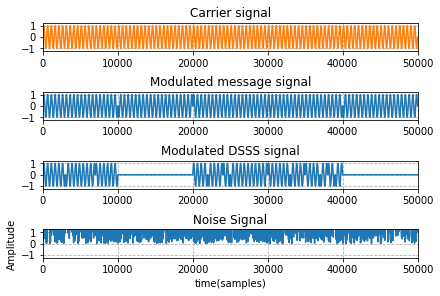

In [115]:
# Carrier signal
Fc = 2    #Carrier frequency
c_samples = np.arange(len(m_t))
carrier = np.sin(2*np.pi*Fc*c_samples/Fs)

# Beside modulating DSSS signal, lets also modulate the message signal and then analyse both in presence of noise signal in PSD
m_t = (m_t * 2 ) - 1
m_psk = carrier * m_t
dsss_psk = carrier * dsss_sig

# Generating a noise signal
Enoise = 90
noise_sig = Enoise * np.random.rand(len(dsss_sig))

# Plotting the individual signals for reference
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(carrier, 'tab:orange')
axs[0].set_title('Carrier signal')
axs[0].set_ylim([-1.25,1.25])
axs[0].set_xlim([0,len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(m_psk)
axs[1].set_title('Modulated message signal')
axs[1].set_ylim([-1.25,1.25])
axs[1].set_xlim([0,len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_psk)
axs[2].set_title('Modulated DSSS signal')
axs[2].set_ylim([-1.25,1.25])
axs[2].set_xlim([0,len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(noise_sig)
axs[3].set_title('Noise Signal')
axs[3].set_ylim([-1.25,1.25])
axs[3].set_xlim([0,len(t)])
axs[3].grid(True, linestyle='--')

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')

## Now, plot the power spectral density (the amount of energy present in each frequency band) for modulated message signal, modulated DSSS signal and the noise signal.

50000
25001
25001


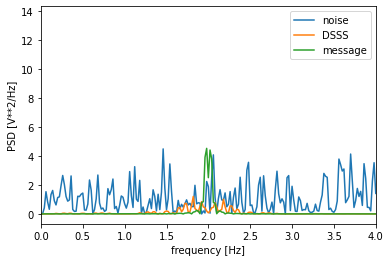

In [116]:
import matplotlib.pyplot as plt
print(len(noise_sig))

#(S, f) = plt.psd(noise_sig, Fs=1000)
(f, S)= scipy.signal.welch(noise_sig, fs=1000, nperseg=50000)
(f1, S1) = scipy.signal.welch(dsss_psk, fs=1000, nperseg=50000)
(f2, S2) = scipy.signal.welch(m_psk, fs=1000, nperseg=50000)
print(len(S))
print(len(f))
l1 = len(S)

#for i in range(0,l): 
#    if f[i] >= 48 and f[i] <= 52:
#        print(f[i],S[i])
        
#print(S, f)
#lt.legend(['noise'])
#(S1, f) = plt.psd(dsss_psk, Fs=Fs)
#lt.legend(['Mod DSSS signal'])
#(S2, f) = plt.psd(m_psk, Fs=Fs)
#lt.legend(['Mod message signal'])

#plt.subplot()

plt.plot(f, S, label='noise')
plt.plot(f1, S1, label ='DSSS')
plt.plot(f2, S2, label='message')
plt.legend()
plt.xlim([0, 4])
#plt.ylim([-1,12])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


(0.0, 3.0)

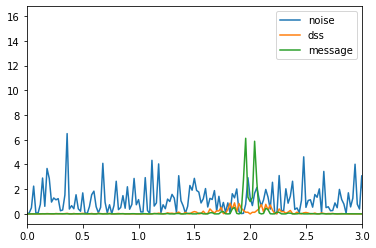

In [118]:
(f, S) = scipy.signal.periodogram(noise_sig, fs=1000, scaling='density')
(f1,S1) = scipy.signal.periodogram(dsss_psk, fs=1000, scaling='density')
(f2,S2) = scipy.signal.periodogram(m_psk, fs=1000, scaling='density')
plt.plot(f, S, label='noise')
plt.plot(f1, S1, label='dss')
plt.plot(f2,S2, label='message')
plt.legend()
# plt.ylim([0, 1])
plt.xlim([0,3])